In [2]:
import pandas as pd

In [3]:
# 데이터 로드
df = pd.read_csv('./data/subwaytime.csv', encoding='cp949',thousands=',')
df.head()


,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51,작업일시
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,하차,승차,하차,승차,하차,승차,하차,승차,하차,NaN
1,2022-08,1호선,150.0,서울역,573,19,"8,638","8,274","12,332","45,706",...,"12,503","2,017","2,148",0,208,0,1,0,0,2022-09-03 10:18:29
2,2022-08,1호선,151.0,시청,39,0,"2,005","4,665","3,404","23,606",...,"2,631",320,688,2,7,0,0,0,0,2022-09-03 10:18:29
3,2022-08,1호선,152.0,종각,54,4,"3,356","4,382","3,765","22,971",...,"3,215",970,607,1,1,0,0,0,0,2022-09-03 10:18:29
4,2022-08,1호선,153.0,종로3가,118,10,"3,367","3,149","3,409","13,161",...,"3,575","1,177","1,455",1,30,0,0,0,0,2022-09-03 10:18:29


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   사용월                617 non-null    object 
 1   호선명                617 non-null    object 
 2   역ID                617 non-null    float64
 3   지하철역               617 non-null    object 
 4   04:00:00~04:59:59  618 non-null    object 
 5   Unnamed: 5         618 non-null    object 
 6   05:00:00~05:59:59  618 non-null    object 
 7   Unnamed: 7         618 non-null    object 
 8   06:00:00~06:59:59  618 non-null    object 
 9   Unnamed: 9         618 non-null    object 
 10  07:00:00~07:59:59  618 non-null    object 
 11  Unnamed: 11        618 non-null    object 
 12  08:00:00~08:59:59  618 non-null    object 
 13  Unnamed: 13        618 non-null    object 
 14  09:00:00~09:59:59  618 non-null    object 
 15  Unnamed: 15        618 non-null    object 
 16  10:00:00~10:59:59  618 non

In [5]:
# 컬럼들좀 봐야겠네~~~

df.columns

Index(['사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', 'Unnamed: 5',
       '05:00:00~05:59:59', 'Unnamed: 7', '06:00:00~06:59:59', 'Unnamed: 9',
       '07:00:00~07:59:59', 'Unnamed: 11', '08:00:00~08:59:59', 'Unnamed: 13',
       '09:00:00~09:59:59', 'Unnamed: 15', '10:00:00~10:59:59', 'Unnamed: 17',
       '11:00:00~11:59:59', 'Unnamed: 19', '12:00:00~12:59:59', 'Unnamed: 21',
       '13:00:00~13:59:59', 'Unnamed: 23', '14:00:00~14:59:59', 'Unnamed: 25',
       '15:00:00~15:59:59', 'Unnamed: 27', '16:00:00~16:59:59', 'Unnamed: 29',
       '17:00:00~17:59:59', 'Unnamed: 31', '18:00:00~18:59:59', 'Unnamed: 33',
       '19:00:00~19:59:59', 'Unnamed: 35', '20:00:00~20:59:59', 'Unnamed: 37',
       '21:00:00~21:59:59', 'Unnamed: 39', '22:00:00~22:59:59', 'Unnamed: 41',
       '23:00:00~23:59:59', 'Unnamed: 43', '00:00:00~00:59:59', 'Unnamed: 45',
       '01:00:00~01:59:59', 'Unnamed: 47', '02:00:00~02:59:59', 'Unnamed: 49',
       '03:00:00~03:59:59', 'Unnamed: 51', '작업일시'],
      dtyp

In [6]:
df.columns.size


53

## 컬럼 이름 새로 만들기

컬럼명 패턴

=> 사용월 호선명 역ID 지하철명

컬럼명 패턴

In [7]:
#새로운 컬럼이름으로 만듦

new_cols = ['사용월', '호선명', '역ID', '지하철역']
for i in range(4,28) :
    new_cols.append(f'{i % 24 }_승차')
    new_cols.append(f'{i % 24 }_하차')

In [8]:
len(new_cols)


52

In [9]:
#작업일시를 제외하고 데이터만 추출
value = df.iloc[1:, : -1].values

In [10]:
value.shape

(617, 52)

In [11]:
#새롭게 만든 컬럼 이름으로 새로운 데이터프레임을 만듬
new_df = pd.DataFrame(data=value, columns=new_cols)
new_df.head()

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_승차,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차
0,2022-08,1호선,150.0,서울역,573,19,"8,638","8,274","12,332","45,706",...,"22,497","12,503","2,017","2,148",0,208,0,1,0,0
1,2022-08,1호선,151.0,시청,39,0,"2,005","4,665","3,404","23,606",...,"8,948","2,631",320,688,2,7,0,0,0,0
2,2022-08,1호선,152.0,종각,54,4,"3,356","4,382","3,765","22,971",...,"26,636","3,215",970,607,1,1,0,0,0,0
3,2022-08,1호선,153.0,종로3가,118,10,"3,367","3,149","3,409","13,161",...,"14,726","3,575","1,177","1,455",1,30,0,0,0,0
4,2022-08,1호선,154.0,종로5가,38,2,"1,632","3,635","2,766","15,329",...,"5,541","2,481",194,728,1,1,0,0,0,0


In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     617 non-null    object
 1   호선명     617 non-null    object
 2   역ID     617 non-null    object
 3   지하철역    617 non-null    object
 4   4_승차    617 non-null    object
 5   4_하차    617 non-null    object
 6   5_승차    617 non-null    object
 7   5_하차    617 non-null    object
 8   6_승차    617 non-null    object
 9   6_하차    617 non-null    object
 10  7_승차    617 non-null    object
 11  7_하차    617 non-null    object
 12  8_승차    617 non-null    object
 13  8_하차    617 non-null    object
 14  9_승차    617 non-null    object
 15  9_하차    617 non-null    object
 16  10_승차   617 non-null    object
 17  10_하차   617 non-null    object
 18  11_승차   617 non-null    object
 19  11_하차   617 non-null    object
 20  12_승차   617 non-null    object
 21  12_하차   617 non-null    object
 22  13_승차   617 non-null    ob

In [13]:
#형변환을 하기위해
#승하차 관련 컬럼들에서 콤마 삭제 -str.replace(',','')

for col in new_df.columns[4:]:
    # print(col)
    new_df[col] = new_df[col].str.replace(',','')


In [14]:
new_df.head()

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_승차,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차
0,2022-08,1호선,150.0,서울역,573,19,8638,8274,12332,45706,...,22497,12503,2017,2148,0,208,0,1,0,0
1,2022-08,1호선,151.0,시청,39,0,2005,4665,3404,23606,...,8948,2631,320,688,2,7,0,0,0,0
2,2022-08,1호선,152.0,종각,54,4,3356,4382,3765,22971,...,26636,3215,970,607,1,1,0,0,0,0
3,2022-08,1호선,153.0,종로3가,118,10,3367,3149,3409,13161,...,14726,3575,1177,1455,1,30,0,0,0,0
4,2022-08,1호선,154.0,종로5가,38,2,1632,3635,2766,15329,...,5541,2481,194,728,1,1,0,0,0,0


In [15]:
for col in new_df.columns[4:]:
    new_df[col]  = new_df[col].astype('int64')

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용월     617 non-null    object
 1   호선명     617 non-null    object
 2   역ID     617 non-null    object
 3   지하철역    617 non-null    object
 4   4_승차    617 non-null    int64 
 5   4_하차    617 non-null    int64 
 6   5_승차    617 non-null    int64 
 7   5_하차    617 non-null    int64 
 8   6_승차    617 non-null    int64 
 9   6_하차    617 non-null    int64 
 10  7_승차    617 non-null    int64 
 11  7_하차    617 non-null    int64 
 12  8_승차    617 non-null    int64 
 13  8_하차    617 non-null    int64 
 14  9_승차    617 non-null    int64 
 15  9_하차    617 non-null    int64 
 16  10_승차   617 non-null    int64 
 17  10_하차   617 non-null    int64 
 18  11_승차   617 non-null    int64 
 19  11_하차   617 non-null    int64 
 20  12_승차   617 non-null    int64 
 21  12_하차   617 non-null    int64 
 22  13_승차   617 non-null    in

## 출근 시간대 가장 많이 타고 내리는 역

In [17]:
new_df['7_승차']

0      39560
1       6430
2       5801
3       4642
4       5251
       ...  
612     9575
613     3212
614    10158
615    19371
616     4375
Name: 7_승차, Length: 617, dtype: int64

In [18]:
len(new_df)

617

막대그래프로 표현

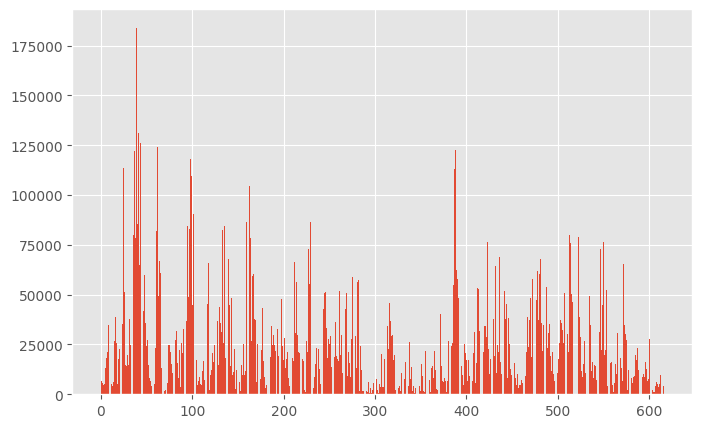

In [19]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')  #스타일 지정

plt.figure(figsize=(8, 5)) #스케치북 사이즈

plt.bar( range(len(new_df) ), new_df['7_승차'] ) # X, Y 꼭 지정

plt.show()

한개의 역이 다른 역들과는 큰 차이를 두고 많다는 것을 알 수 있다. 

그러면 출근 시간대라고 할 수 있는 7-9시까지 승차 인원을 합치면 어떻게 될까? (출근시간대_승차합계)

In [20]:
new_df['출근시간대_승차합계']  = new_df['7_승차'] + new_df['8_승차'] + new_df['9_승차']
new_df.head()

,사용월,호선명,역ID,지하철역,4_승차,4_하차,5_승차,5_하차,6_승차,6_하차,...,23_하차,0_승차,0_하차,1_승차,1_하차,2_승차,2_하차,3_승차,3_하차,출근시간대_승차합계
0,2022-08,1호선,150.0,서울역,573,19,8638,8274,12332,45706,...,12503,2017,2148,0,208,0,1,0,0,154546
1,2022-08,1호선,151.0,시청,39,0,2005,4665,3404,23606,...,2631,320,688,2,7,0,0,0,0,25005
2,2022-08,1호선,152.0,종각,54,4,3356,4382,3765,22971,...,3215,970,607,1,1,0,0,0,0,27170
3,2022-08,1호선,153.0,종로3가,118,10,3367,3149,3409,13161,...,3575,1177,1455,1,30,0,0,0,0,25674
4,2022-08,1호선,154.0,종로5가,38,2,1632,3635,2766,15329,...,2481,194,728,1,1,0,0,0,0,26373
